In [121]:
#we use a data set that contains information about customers of an
#online trading platform to classify whether a given customer's probability
#of churn will be high, medium, or low.

In [122]:
def warn(*args,**kwargs):
  pass

import warnings
warnings.warn=warn
warnings.filterwarnings('ignore',category=DeprecationWarning)
warn()


from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns

# Patching scikitplot to work with newer scipy versions
import scipy
if not hasattr(scipy, 'interp'):
    scipy.interp = np.interp

import scikitplot as skplt
%matplotlib inline

from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')

In [123]:
#Data exploration
df_churn=pd.read_csv('/content/churn.csv')
df_churn.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [124]:
print("The dataset contains columns of the following data types : \n" + str(df_churn.dtypes))

The dataset contains columns of the following data types : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


In [125]:
print("The dataset contains following number of records for each of the columns: \n" +str(df_churn.count()))
#The count mismatch in the gender column(handled in the data preprocessing)

The dataset contains following number of records for each of the columns: 
ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64


Each category within the churnrisk column has the count given below-
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


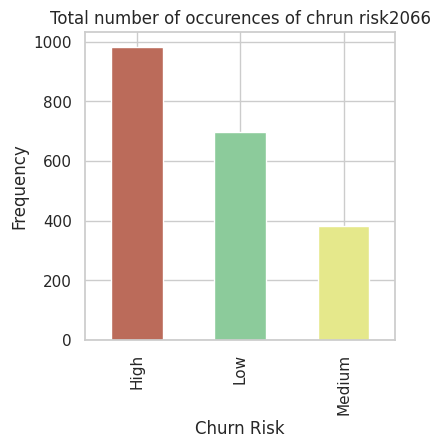

In [126]:
print("Each category within the churnrisk column has the count given below-")
print(df_churn.groupby(['CHURNRISK']).size())

#Chrunrisk Column representation for better understanding
index=['High','Medium','Low']
churn_plot=df_churn['CHURNRISK'].value_counts(sort=True,ascending=False).plot(kind='bar',figsize=(4,4),title="Total number of occurences of chrun risk"+str(df_churn['CHURNRISK'].count()),color=['#BB6B5A', '#8CCB9B', '#E5E88B'])

churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")
plt.show()

In [127]:
"preprocessing"
df_churn=df_churn.drop(['ID'], axis=1)
df_churn.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [128]:
categoricalcol=['GENDER','STATUS','HOMEOWNER']
print("Categorical columns in the dataset are-")
print(categoricalcol)

impute_category=SimpleImputer(strategy='most_frequent')
onehot_encoder=OneHotEncoder(handle_unknown='ignore')

category_tranformer=Pipeline(steps=[('impute',impute_category),('onehot',onehot_encoder)])
#This combines both steps into a single pipeline that will:
#First fill missing values (impute step)
#Then convert categories to numbers (onehot step)


Categorical columns in the dataset are-
['GENDER', 'STATUS', 'HOMEOWNER']


In [129]:
# Defining the numerical columns
numericalColumns = df_churn.select_dtypes(include=[np.number]).columns

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [130]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', category_tranformer,
                                                                    categoricalcol) ],
                                            remainder="passthrough" )
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', category_tranformer, categoricalcol),
                                                            ('num', numerical_transformer, numericalColumns) ],
                                                remainder="passthrough" )

#. The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn)

print("Data after transforming :")

print(df_churn_pd_temp)

df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn)
print("Data after transforming :")
print(df_churn_pd_temp_2)

Data after transforming :
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming :
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


In [131]:
features=[]
features=df_churn.drop(['CHURNRISK'],axis=1)

label_churn=pd.DataFrame(df_churn,columns=['CHURNRISK'])

label_encoder=LabelEncoder()
label=df_churn['CHURNRISK']

label=label_encoder.fit_transform(label)
print("encoded value of churnrisk after label encoding:-"+str(label))

encoded value of churnrisk after label encoding:-[2 1 1 ... 2 1 1]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)
print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) + " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) + " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1549, 15) Output label(1549,)
Dimensions of datasets that will be used for testing : Input features(517, 15) Output label(517,)


In [133]:
model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=60, max_depth=3, random_state=12)

In [134]:
rfc_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('classifier', randomForestClassifier)])

In [135]:
# Build models

rfc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'STATUS',
                                                   'HOMEOWNER']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=60,
                                        random_state=12))])

In [136]:
y_pred_rfc = rfc_model.predict(X_test)

Accuracy of Random Forest Classifier: 0.9400

Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       251
           1       0.99      1.00      0.99       170
           2       0.97      0.70      0.81        96

    accuracy                           0.94       517
   macro avg       0.95      0.90      0.92       517
weighted avg       0.94      0.94      0.94       517



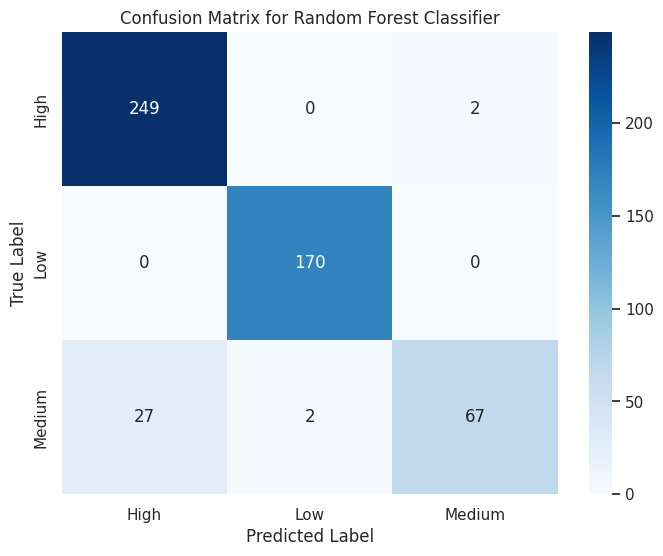

In [137]:
# prompt: accuracy,classification report and confusin metrics of this model

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy of {model_name}: {accuracy_rfc:.4f}")

# Print classification report
print(f"\nClassification Report for {model_name}:\n")
print(classification_report(y_test, y_pred_rfc))

# Calculate confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()


In [138]:
print("checking for overfitting\n")

print("Train Accuracy:", accuracy_score(y_train, rfc_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rfc_model.predict(X_test)))

print('--------------------------------------------')
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc_model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

checking for overfitting

Train Accuracy: 0.9347966429954809
Test Accuracy: 0.9400386847195358
--------------------------------------------
Cross-validation scores: [0.94516129 0.90967742 0.92580645 0.93870968 0.92556634]
Mean CV score: 0.9289842363503498


In [ ]:
import pickle

# Save the trained model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(randomForestClassifier, f)